In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from factor_analyzer import FactorAnalyzer # Perform statistical tests before PCA 
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Education+-+Post+12th+Standard (1).csv')

In [3]:
df.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
df.shape

(777, 18)

In [5]:
df.dtypes

Names           object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [6]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


<AxesSubplot:xlabel='Top10perc'>

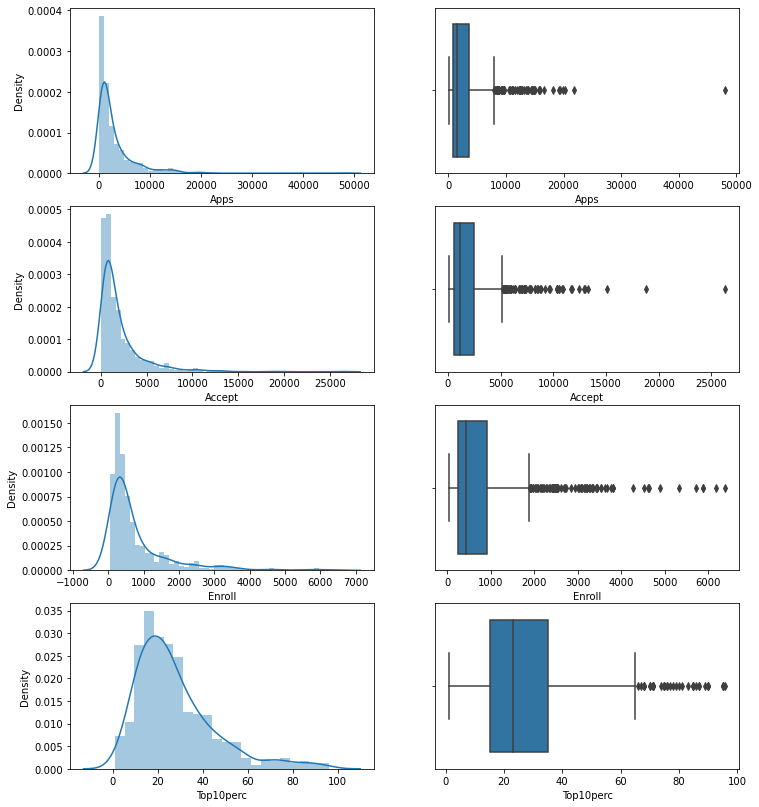

In [7]:
fig,axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12,14)

sns.distplot(df['Apps'],ax= axes[0][0])
sns.boxplot(df['Apps'],orient='H',ax= axes[0][1])

sns.distplot(df['Accept'],ax= axes[1][0])
sns.boxplot(df['Accept'],orient='H',ax= axes[1][1])

sns.distplot(df['Enroll'],ax= axes[2][0])
sns.boxplot(df['Enroll'],orient='H',ax= axes[2][1])

sns.distplot(df['Top10perc'],ax= axes[3][0])
sns.boxplot(df['Top10perc'],orient='H',ax= axes[3][1])

<AxesSubplot:xlabel='Outstate'>

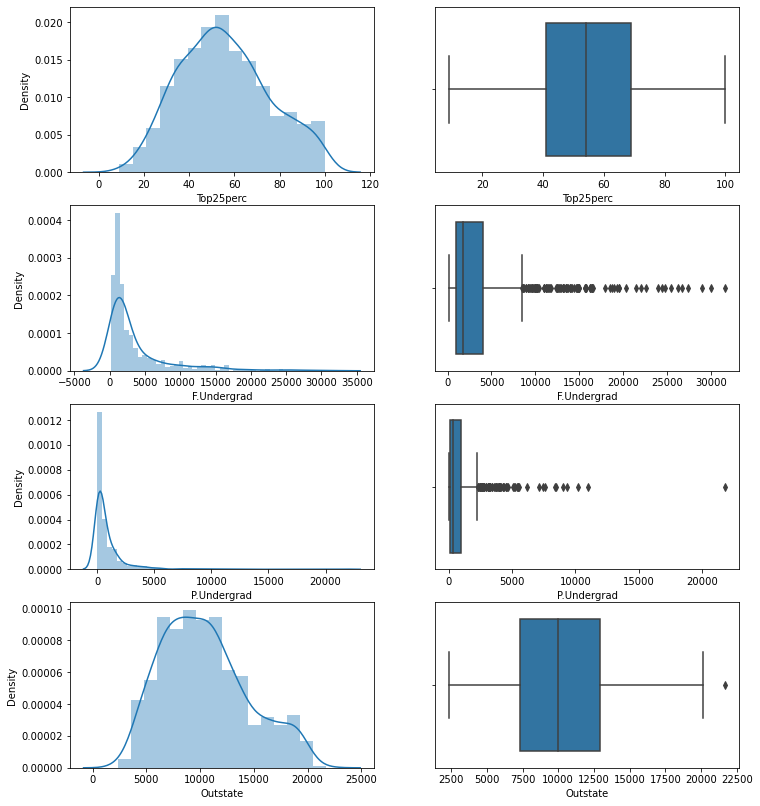

In [8]:
fig,axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12,14)

sns.distplot(df['Top25perc'],ax= axes[0][0])
sns.boxplot(df['Top25perc'],orient='H',ax= axes[0][1])

sns.distplot(df['F.Undergrad'],ax= axes[1][0])
sns.boxplot(df['F.Undergrad'],orient='H',ax= axes[1][1])

sns.distplot(df['P.Undergrad'],ax= axes[2][0])
sns.boxplot(df['P.Undergrad'],orient='H',ax= axes[2][1])

sns.distplot(df['Outstate'],ax= axes[3][0])
sns.boxplot(df['Outstate'],orient='H',ax= axes[3][1])

<AxesSubplot:xlabel='PhD'>

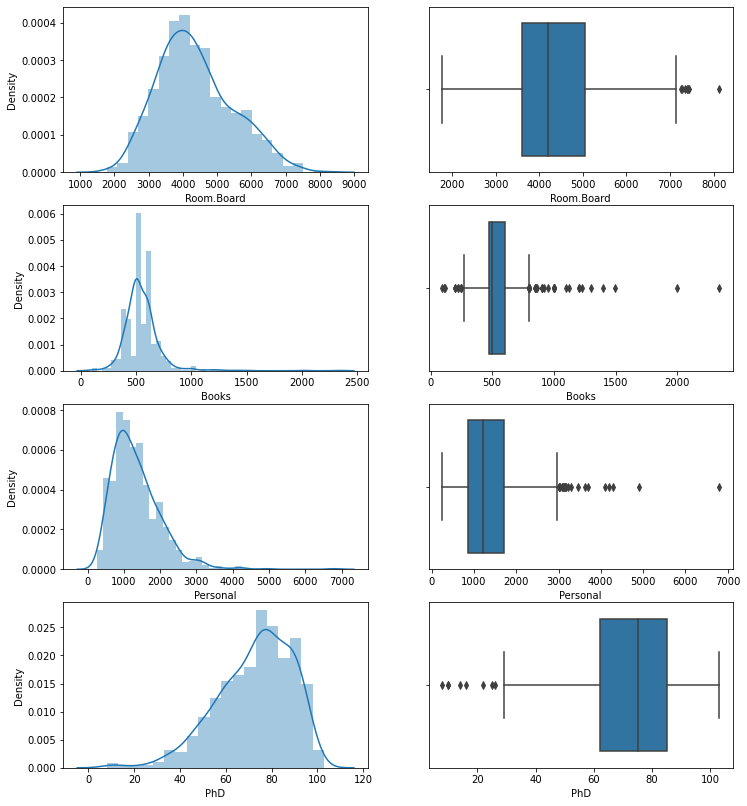

In [9]:
fig,axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12,14)

sns.distplot(df['Room.Board'],ax= axes[0][0])
sns.boxplot(df['Room.Board'],orient='H',ax= axes[0][1])

sns.distplot(df['Books'],ax= axes[1][0])
sns.boxplot(df['Books'],orient='H',ax= axes[1][1])

sns.distplot(df['Personal'],ax= axes[2][0])
sns.boxplot(df['Personal'],orient='H',ax= axes[2][1])

sns.distplot(df['PhD'],ax= axes[3][0])
sns.boxplot(df['PhD'],orient='H',ax= axes[3][1])

<AxesSubplot:xlabel='Grad.Rate'>

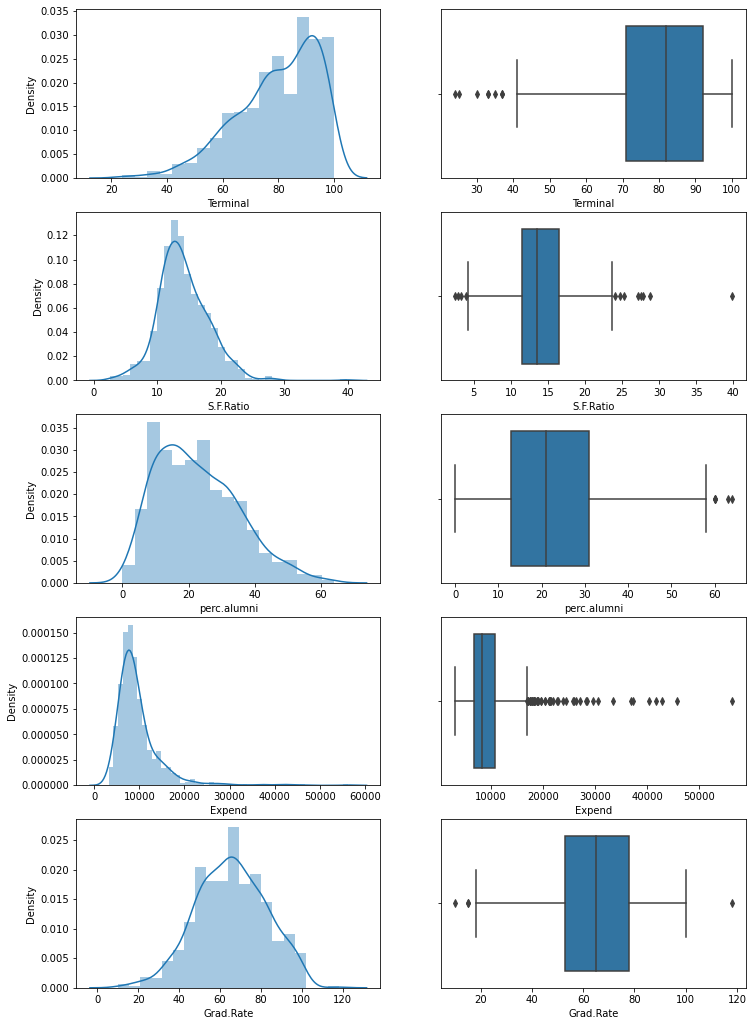

In [10]:
fig,axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(12,18)

sns.distplot(df['Terminal'],ax= axes[0][0])
sns.boxplot(df['Terminal'],orient='H',ax= axes[0][1])

sns.distplot(df['S.F.Ratio'],ax= axes[1][0])
sns.boxplot(df['S.F.Ratio'],orient='H',ax= axes[1][1])

sns.distplot(df['perc.alumni'],ax= axes[2][0])
sns.boxplot(df['perc.alumni'],orient='H',ax= axes[2][1])

sns.distplot(df['Expend'],ax= axes[3][0])
sns.boxplot(df['Expend'],orient='H',ax= axes[3][1])

sns.distplot(df['Grad.Rate'],ax= axes[4][0])
sns.boxplot(df['Grad.Rate'],orient='H',ax= axes[4][1])

In [11]:
df.skew()

Apps           3.723750
Accept         3.417727
Enroll         2.690465
Top10perc      1.413217
Top25perc      0.259340
F.Undergrad    2.610458
P.Undergrad    5.692353
Outstate       0.509278
Room.Board     0.477356
Books          3.485025
Personal       1.742497
PhD           -0.768170
Terminal      -0.816542
S.F.Ratio      0.667435
perc.alumni    0.606891
Expend         3.459322
Grad.Rate     -0.113777
dtype: float64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [13]:
corr = df.corr(method='pearson')

In [14]:
corr

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


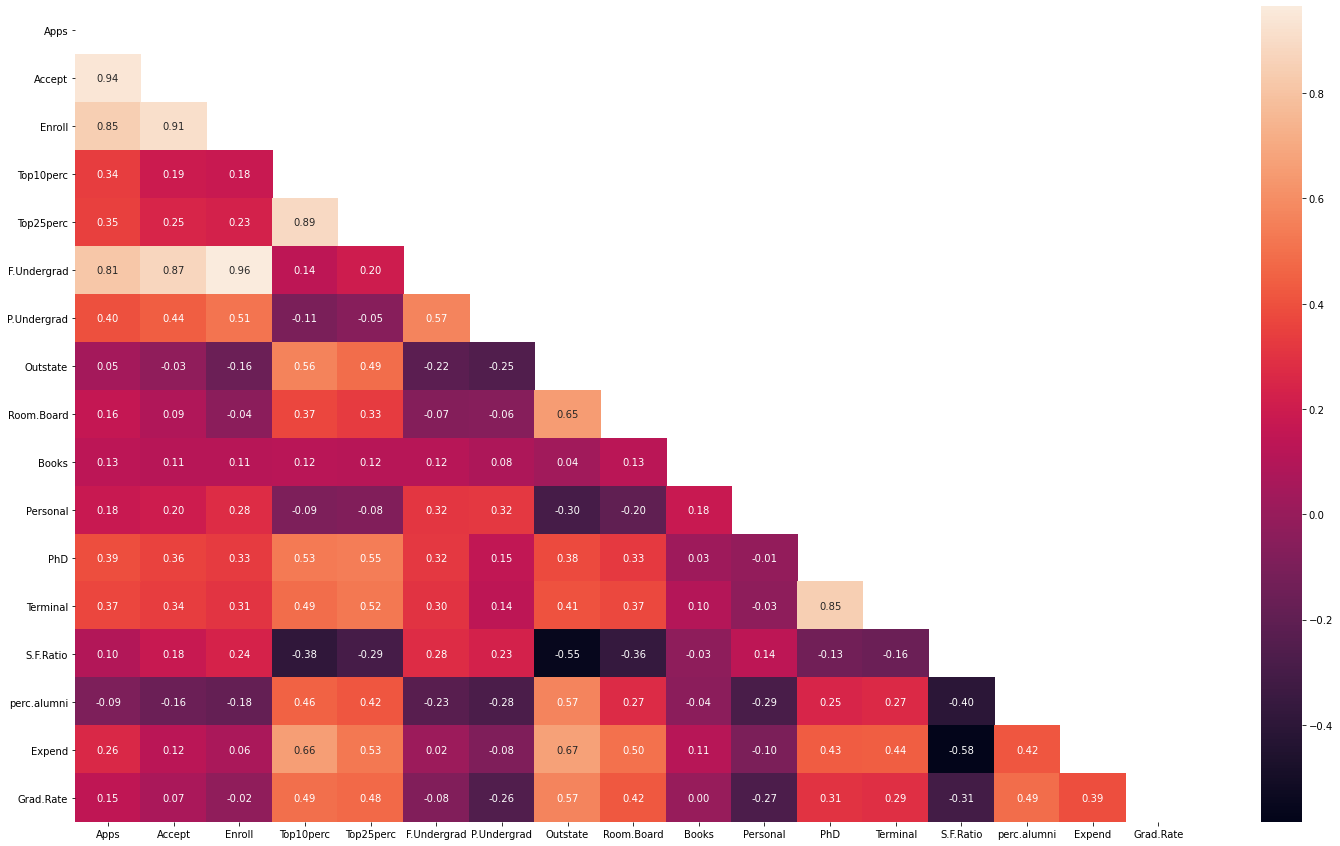

In [15]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(df.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

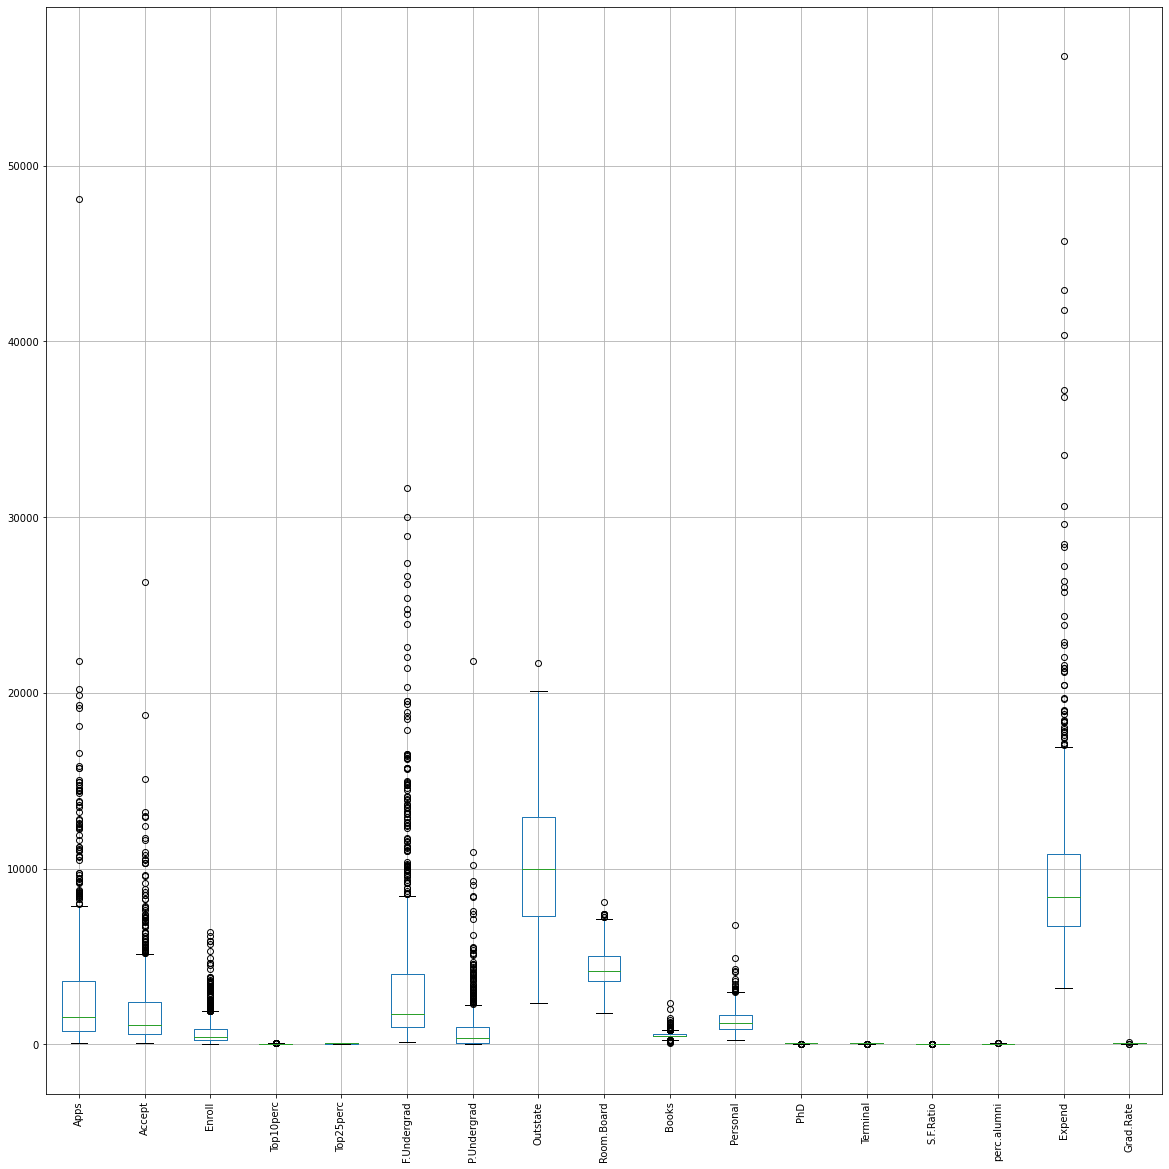

In [16]:
df.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

In [17]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [18]:
lrapps,urapps=remove_outlier(df['Apps'])
df['Apps']=np.where(df['Apps']>urapps,urapps,df['Apps'])
df['Apps']=np.where(df['Apps']<lrapps,lrapps,df['Apps'])

lraccept,uraccept=remove_outlier(df['Accept'])
df['Accept']=np.where(df['Accept']>uraccept,uraccept,df['Accept'])
df['Accept']=np.where(df['Accept']<lraccept,lraccept,df['Accept'])

lrenroll,urenroll=remove_outlier(df['Enroll'])
df['Enroll']=np.where(df['Enroll']>urenroll,urenroll,df['Enroll'])
df['Enroll']=np.where(df['Enroll']<lrenroll,lrenroll,df['Enroll'])

lrtop10perc,urtop10perc=remove_outlier(df['Top10perc'])
df['Top10perc']=np.where(df['Top10perc']>urtop10perc,urtop10perc,df['Top10perc'])
df['Top10perc']=np.where(df['Top10perc']<lrtop10perc,lrtop10perc,df['Top10perc'])

lrfundergrad,urfundergrad=remove_outlier(df['F.Undergrad'])
df['F.Undergrad']=np.where(df['F.Undergrad']>urfundergrad,urfundergrad,df['F.Undergrad'])
df['F.Undergrad']=np.where(df['F.Undergrad']<lrfundergrad,lrfundergrad,df['F.Undergrad'])

lrpundergrad,urpunderground=remove_outlier(df['P.Undergrad'])
df['P.Undergrad']=np.where(df['P.Undergrad']>urpunderground,urpunderground,df['P.Undergrad'])
df['P.Undergrad']=np.where(df['P.Undergrad']<lrpundergrad,lrpundergrad,df['P.Undergrad'])

lroutstate,uroutstate=remove_outlier(df['Outstate'])
df['Outstate']=np.where(df['Outstate']>uroutstate,uroutstate,df['Outstate'])
df['Outstate']=np.where(df['Outstate']<lroutstate,lroutstate,df['Outstate'])

In [19]:
lrroomboard,urroomboard=remove_outlier(df['Room.Board'])
df['Room.Board']=np.where(df['Room.Board']>urroomboard,urroomboard,df['Room.Board'])
df['Room.Board']=np.where(df['Room.Board']<lrroomboard,lrroomboard,df['Room.Board'])

lrbooks,urbooks=remove_outlier(df['Books'])
df['Books']=np.where(df['Books']>urbooks,urbooks,df['Books'])
df['Books']=np.where(df['Books']<lrbooks,lrbooks,df['Books'])

lrpersonal,urpersonal=remove_outlier(df['Personal'])
df['Personal']=np.where(df['Personal']>urpersonal,urpersonal,df['Personal'])
df['Personal']=np.where(df['Personal']<lrpersonal,lrpersonal,df['Personal'])

lrphd,urphd=remove_outlier(df['PhD'])
df['PhD']=np.where(df['PhD']>urphd,urphd,df['PhD'])
df['PhD']=np.where(df['PhD']<lrphd,lrphd,df['PhD'])

lrterminal,urterminal=remove_outlier(df['Terminal'])
df['Terminal']=np.where(df['Terminal']>urterminal,urterminal,df['Terminal'])
df['Terminal']=np.where(df['Terminal']<lrterminal,lrterminal,df['Terminal'])

lrsfratio,ursfratio=remove_outlier(df['S.F.Ratio'])
df['S.F.Ratio']=np.where(df['S.F.Ratio']>ursfratio,ursfratio,df['S.F.Ratio'])
df['S.F.Ratio']=np.where(df['S.F.Ratio']<lrsfratio,lrsfratio,df['S.F.Ratio'])

lrpercalumni,urpercalumni=remove_outlier(df['perc.alumni'])
df['perc.alumni']=np.where(df['perc.alumni']>urpercalumni,urpercalumni,df['perc.alumni'])
df['perc.alumni']=np.where(df['perc.alumni']<lrpercalumni,lrpercalumni,df['perc.alumni'])

In [20]:
lrexpend,urexpend=remove_outlier(df['Expend'])
df['Expend']=np.where(df['Expend']>urexpend,urexpend,df['Expend'])
df['Expend']=np.where(df['Expend']<lrexpend,lrexpend,df['Expend'])

lrgradrate,urgradrate=remove_outlier(df['Grad.Rate'])
df['Grad.Rate']=np.where(df['Grad.Rate']>urgradrate,urgradrate,df['Grad.Rate'])
df['Grad.Rate']=np.where(df['Grad.Rate']<lrgradrate,lrgradrate,df['Grad.Rate'])

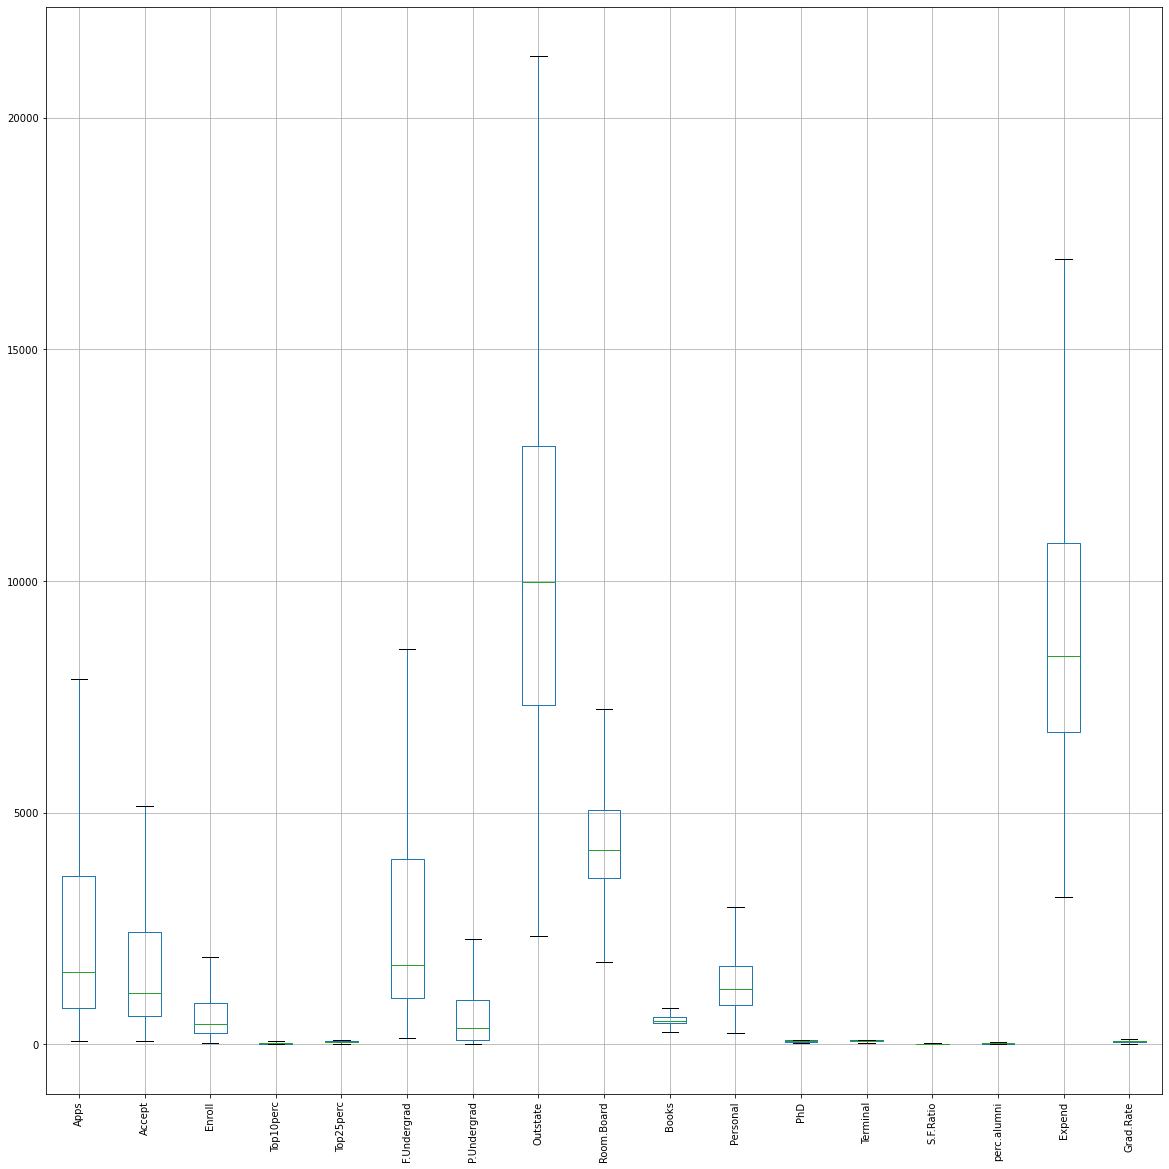

In [21]:
df.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    float64
 2   Accept       777 non-null    float64
 3   Enroll       777 non-null    float64
 4   Top10perc    777 non-null    float64
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    float64
 7   P.Undergrad  777 non-null    float64
 8   Outstate     777 non-null    float64
 9   Room.Board   777 non-null    float64
 10  Books        777 non-null    float64
 11  Personal     777 non-null    float64
 12  PhD          777 non-null    float64
 13  Terminal     777 non-null    float64
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    float64
 16  Expend       777 non-null    float64
 17  Grad.Rate    777 non-null    float64
dtypes: float64(16), int64(1), object(1)
memory usage: 

In [23]:
df1=df.drop(['Names'], axis=1)
df1.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660.0,1232.0,721.0,23.0,52,2885.0,537.0,7440.0,3300.0,450.0,2200.0,70.0,78.0,18.1,12.0,7041.0,60.0
1,2186.0,1924.0,512.0,16.0,29,2683.0,1227.0,12280.0,6450.0,750.0,1500.0,29.0,39.5,12.2,16.0,10527.0,56.0
2,1428.0,1097.0,336.0,22.0,50,1036.0,99.0,11250.0,3750.0,400.0,1165.0,53.0,66.0,12.9,30.0,8735.0,54.0
3,417.0,349.0,137.0,60.0,89,510.0,63.0,12960.0,5450.0,450.0,875.0,92.0,97.0,7.7,37.0,16948.5,59.0
4,193.0,146.0,55.0,16.0,44,249.0,869.0,7560.0,4120.0,795.0,1500.0,76.0,72.0,11.9,2.0,10922.0,15.5


In [24]:
from scipy.stats import zscore
df_num_scaled=df1.apply(zscore)
df_num_scaled.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.376493,-0.337830,0.106380,-0.246780,-0.191827,-0.018769,-0.166083,-0.746480,-0.968324,-0.776567,1.438500,-0.174045,-0.123239,1.070602,-0.870466,-0.630916,-0.319205
1,-0.159195,0.116744,-0.260441,-0.696290,-1.353911,-0.093626,0.797856,0.457762,1.921680,1.828605,0.289289,-2.745731,-2.785068,-0.489511,-0.545726,0.396097,-0.552693
2,-0.472336,-0.426511,-0.569343,-0.310996,-0.292878,-0.703966,-0.777974,0.201488,-0.555466,-1.210762,-0.260691,-1.240354,-0.952900,-0.304413,0.590864,-0.131845,-0.669437
3,-0.889994,-0.917871,-0.918613,2.129202,1.677612,-0.898889,-0.828267,0.626954,1.004218,-0.776567,-0.736792,1.205884,1.190391,-1.679429,1.159159,2.287940,-0.377577
4,-0.982532,-1.051221,-1.062533,-0.696290,-0.596031,-0.995610,0.297726,-0.716623,-0.216006,2.219381,0.289289,0.202299,-0.538069,-0.568839,-1.682316,0.512468,-2.916759


In [25]:
df_num_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Apps         777 non-null    float64
 1   Accept       777 non-null    float64
 2   Enroll       777 non-null    float64
 3   Top10perc    777 non-null    float64
 4   Top25perc    777 non-null    float64
 5   F.Undergrad  777 non-null    float64
 6   P.Undergrad  777 non-null    float64
 7   Outstate     777 non-null    float64
 8   Room.Board   777 non-null    float64
 9   Books        777 non-null    float64
 10  Personal     777 non-null    float64
 11  PhD          777 non-null    float64
 12  Terminal     777 non-null    float64
 13  S.F.Ratio    777 non-null    float64
 14  perc.alumni  777 non-null    float64
 15  Expend       777 non-null    float64
 16  Grad.Rate    777 non-null    float64
dtypes: float64(17)
memory usage: 103.3 KB


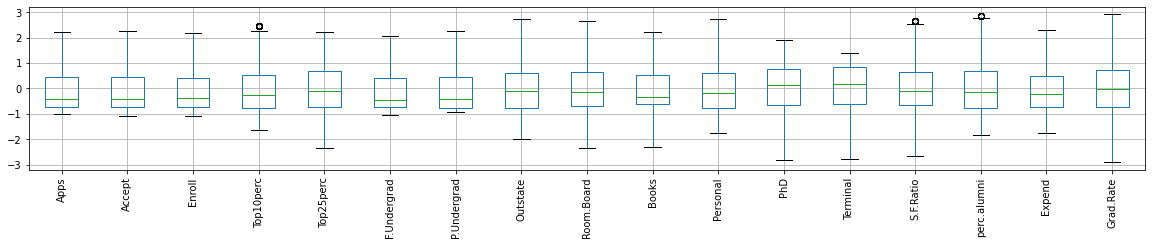

In [26]:
df_num_scaled.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

In [27]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_num_scaled)
p_value

0.0

In [28]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_num_scaled)
kmo_model

0.84946246682314

In [29]:
# Step 1- Create the covariance Matrix
cov_matrix = np.cov(df_num_scaled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866e+00  9.56537704e-01  8.98039052e-01  3.21756324e-01
   3.64960691e-01  8.62111140e-01  5.20492952e-01  6.54209711e-02
   1.87717056e-01  2.36441941e-01  2.30243993e-01  4.64521757e-01
   4.35037784e-01  1.26573895e-01 -1.01288006e-01  2.43248206e-01
   1.50997775e-01]
 [ 9.56537704e-01  1.00128866e+00  9.36482483e-01  2.23586208e-01
   2.74033187e-01  8.98189799e-01  5.73428908e-01 -5.00874847e-03
   1.19740419e-01  2.08974091e-01  2.56676290e-01  4.27891234e-01
   4.03929238e-01  1.88748711e-01 -1.65728801e-01  1.62016688e-01
   7.90839722e-02]
 [ 8.98039052e-01  9.36482483e-01  1.00128866e+00  1.71977357e-01
   2.30730728e-01  9.68548601e-01  6.42421828e-01 -1.55856056e-01
  -2.38762560e-02  2.02317274e-01  3.39785395e-01  3.82031198e-01
   3.54835877e-01  2.74622251e-01 -2.23009677e-01  5.42906862e-02
  -2.32810071e-02]
 [ 3.21756324e-01  2.23586208e-01  1.71977357e-01  1.00128866e+00
   9.15052977e-01  1.11358019e-01 -1.80240778e-01  5.62884044e-

In [30]:
cov_matrix1 = np.cov(df_num_scaled)
print('Covariance Matrix \n%s', cov_matrix1)

Covariance Matrix 
%s [[ 0.39728021 -0.18584152 -0.01909896 ... -0.05025984 -0.41106778
   0.17096373]
 [-0.18584152  1.61327963  0.08300998 ...  0.04838876 -0.10924942
  -0.22225919]
 [-0.01909896  0.08300998  0.21261253 ... -0.0385113   0.16013293
  -0.07338076]
 ...
 [-0.05025984  0.04838876 -0.0385113  ...  0.21807345 -0.05505902
  -0.0563193 ]
 [-0.41106778 -0.10924942  0.16013293 ... -0.05505902  1.52015207
  -0.48150377]
 [ 0.17096373 -0.22225919 -0.07338076 ... -0.0563193  -0.48150377
   0.74695292]]


In [31]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n %s', eig_vals)
print('\n')
print('Eigen Vectors \n %s', eig_vecs)


 Eigen Values 
 %s [5.6625219  4.89470815 1.12636744 1.00397659 0.87218426 0.7657541
 0.58491404 0.5445048  0.42352336 0.38101777 0.24701456 0.02239369
 0.03789395 0.14726392 0.13434483 0.09883384 0.07469003]


Eigen Vectors 
 %s [[-2.62171542e-01  3.14136258e-01  8.10177245e-02 -9.87761685e-02
  -2.19898081e-01  2.18800617e-03 -2.83715076e-02 -8.99498102e-02
   1.30566998e-01 -1.56464458e-01 -8.62132843e-02  1.82169814e-01
  -5.99137640e-01  8.99775288e-02  8.88697944e-02  5.49428396e-01
   5.41453698e-03]
 [-2.30562461e-01  3.44623583e-01  1.07658626e-01 -1.18140437e-01
  -1.89634940e-01 -1.65212882e-02 -1.29584896e-02 -1.37606312e-01
   1.42275847e-01 -1.49209799e-01 -4.25899061e-02 -3.91041719e-01
   6.61496927e-01  1.58861886e-01  4.37945938e-02  2.91572312e-01
   1.44582845e-02]
 [-1.89276397e-01  3.82813322e-01  8.55296892e-02 -9.30717094e-03
  -1.62314818e-01 -6.80794143e-02 -1.52403625e-02 -1.44216938e-01
   5.08712481e-02 -6.48997860e-02 -4.38408622e-02  7.16684935e-01
   2.

In [32]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 33.26608367  62.02142867  68.63859223  74.53673619  79.66062886
  84.15926753  87.59551019  90.79435736  93.28246491  95.52086136
  96.97201814  97.83716159  98.62640821  99.20703552  99.64582321
  99.86844192 100.        ]


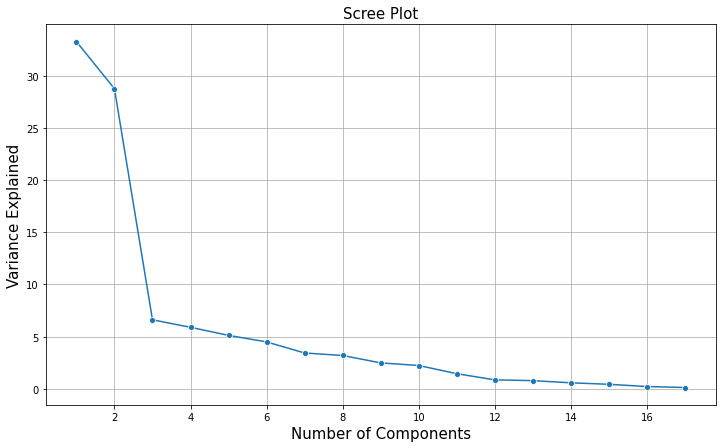

In [33]:
# Step 3 View Scree Plot to identify the number of components to be built
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

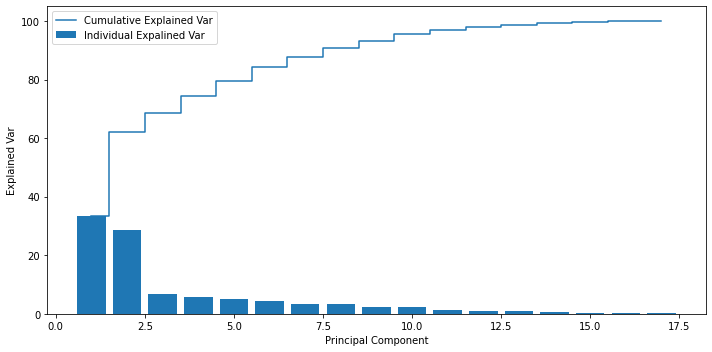

In [34]:
plt.figure(figsize=(10,5))
plt.bar(range(1,eig_vals.size+1), var_exp,align='center', label='Individual Expalined Var')
plt.step(range(1,eig_vals.size+1), cum_var_exp, where = 'mid', label='Cumulative Explained Var')
plt.ylabel('Explained Var')
plt.xlabel('Principal Component')
plt.legend(loc='best')
plt.tight_layout()

In [35]:
# Step 4 Apply PCA for the number of decided components to get the loadings and component output

# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA
# NOTE - we are generating only 8 PCA dimensions (dimensionality reduction from 33 to 8)
pca = PCA(n_components=7, random_state=123)#step 1
df_pca = pca.fit_transform(df_num_scaled)#step 2
df_pca.transpose() # Component output#step 3

array([[-1.60249937, -1.80467545, -1.60828257, ..., -0.57688267,
         6.570952  , -0.47739307],
       [ 0.99368301, -0.07041499, -1.38279212, ...,  0.01779846,
        -1.18493014,  1.04394672],
       [ 0.03004476,  2.12212752, -0.50151255, ...,  0.32216034,
         1.32596561, -1.42543835],
       ...,
       [-0.36688624,  2.4532119 ,  0.76599685, ...,  0.17522459,
         1.36851658,  0.7209176 ],
       [-0.69747582,  0.99485851, -1.02623665, ...,  0.50404279,
        -0.8227456 ,  1.0518097 ],
       [ 0.71061626, -0.39608317, -0.16531057, ..., -1.45835209,
         1.20132639,  1.07308672]])

In [36]:
pca.components_

array([[ 2.62171542e-01,  2.30562461e-01,  1.89276397e-01,
         3.38874521e-01,  3.34690532e-01,  1.63293010e-01,
         2.24797091e-02,  2.83547285e-01,  2.44186588e-01,
         9.67082754e-02, -3.52299594e-02,  3.26410696e-01,
         3.23115980e-01, -1.63151642e-01,  1.86610828e-01,
         3.28955847e-01,  2.38822447e-01],
       [ 3.14136258e-01,  3.44623583e-01,  3.82813322e-01,
        -9.93191661e-02, -5.95055011e-02,  3.98636372e-01,
         3.57550046e-01, -2.51863617e-01, -1.31909124e-01,
         9.39739472e-02,  2.32439594e-01,  5.51390195e-02,
         4.30332048e-02,  2.59804556e-01, -2.57092552e-01,
        -1.60008951e-01, -1.67523664e-01],
       [-8.10177245e-02, -1.07658626e-01, -8.55296892e-02,
         7.88293849e-02,  5.07938247e-02, -7.37077827e-02,
        -4.03568700e-02, -1.49394795e-02,  2.11379165e-02,
         6.97121128e-01,  5.30972806e-01, -8.11134044e-02,
        -5.89785929e-02, -2.74150657e-01, -1.03715887e-01,
         1.84205687e-01, -2.4

In [37]:
cov_mat=pd.DataFrame.cov(df_num_scaled)
cov_mat

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.001289,0.956538,0.898039,0.321756,0.364961,0.862111,0.520493,0.065421,0.187717,0.236442,0.230244,0.464522,0.435038,0.126574,-0.101288,0.243248,0.150998
Accept,0.956538,1.001289,0.936482,0.223586,0.274033,0.898190,0.573429,-0.005009,0.119740,0.208974,0.256676,0.427891,0.403929,0.188749,-0.165729,0.162017,0.079084
Enroll,0.898039,0.936482,1.001289,0.171977,0.230731,0.968549,0.642422,-0.155856,-0.023876,0.202317,0.339785,0.382031,0.354836,0.274622,-0.223010,0.054291,-0.023281
Top10perc,0.321756,0.223586,0.171977,1.001289,0.915053,0.111358,-0.180241,0.562884,0.357826,0.153650,-0.116880,0.544749,0.507401,-0.388426,0.456384,0.657886,0.494307
Top25perc,0.364961,0.274033,0.230731,0.915053,1.001289,0.181429,-0.099423,0.490200,0.331413,0.169980,-0.086922,0.552172,0.528334,-0.297616,0.417369,0.573643,0.479602
F.Undergrad,0.862111,0.898190,0.968549,0.111358,0.181429,1.001289,0.697027,-0.226457,-0.054546,0.208147,0.360246,0.362030,0.335486,0.324922,-0.285825,0.000371,-0.082345
P.Undergrad,0.520493,0.573429,0.642422,-0.180241,-0.099423,0.697027,1.001289,-0.354673,-0.067725,0.122686,0.344496,0.127827,0.122309,0.371085,-0.419874,-0.202189,-0.265499
Outstate,0.065421,-0.005009,-0.155856,0.562884,0.490200,-0.226457,-0.354673,1.001289,0.656334,0.005117,-0.326029,0.391825,0.413110,-0.574422,0.566465,0.776327,0.573196
Room.Board,0.187717,0.119740,-0.023876,0.357826,0.331413,-0.054546,-0.067725,0.656334,1.001289,0.109065,-0.219837,0.341909,0.379759,-0.376915,0.272744,0.581370,0.426339
Books,0.236442,0.208974,0.202317,0.153650,0.169980,0.208147,0.122686,0.005117,0.109065,1.001289,0.240172,0.136566,0.159523,-0.008547,-0.042887,0.150177,-0.008061


In [38]:
cov_matrix=np.cov(df_num_scaled.T)
cov_matrix

array([[ 1.00128866e+00,  9.56537704e-01,  8.98039052e-01,
         3.21756324e-01,  3.64960691e-01,  8.62111140e-01,
         5.20492952e-01,  6.54209711e-02,  1.87717056e-01,
         2.36441941e-01,  2.30243993e-01,  4.64521757e-01,
         4.35037784e-01,  1.26573895e-01, -1.01288006e-01,
         2.43248206e-01,  1.50997775e-01],
       [ 9.56537704e-01,  1.00128866e+00,  9.36482483e-01,
         2.23586208e-01,  2.74033187e-01,  8.98189799e-01,
         5.73428908e-01, -5.00874847e-03,  1.19740419e-01,
         2.08974091e-01,  2.56676290e-01,  4.27891234e-01,
         4.03929238e-01,  1.88748711e-01, -1.65728801e-01,
         1.62016688e-01,  7.90839722e-02],
       [ 8.98039052e-01,  9.36482483e-01,  1.00128866e+00,
         1.71977357e-01,  2.30730728e-01,  9.68548601e-01,
         6.42421828e-01, -1.55856056e-01, -2.38762560e-02,
         2.02317274e-01,  3.39785395e-01,  3.82031198e-01,
         3.54835877e-01,  2.74622251e-01, -2.23009677e-01,
         5.42906862e-02, -2.3

In [39]:
df_num_scaled.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.955307,0.896883,0.321342,0.364491,0.861002,0.519823,0.065337,0.187475,0.236138,0.229948,0.463924,0.434478,0.126411,-0.101158,0.242935,0.150803
Accept,0.955307,1.000000,0.935277,0.223298,0.273681,0.897034,0.572691,-0.005002,0.119586,0.208705,0.256346,0.427341,0.403409,0.188506,-0.165516,0.161808,0.078982
Enroll,0.896883,0.935277,1.000000,0.171756,0.230434,0.967302,0.641595,-0.155655,-0.023846,0.202057,0.339348,0.381540,0.354379,0.274269,-0.222723,0.054221,-0.023251
Top10perc,0.321342,0.223298,0.171756,1.000000,0.913875,0.111215,-0.180009,0.562160,0.357366,0.153452,-0.116730,0.544048,0.506748,-0.387926,0.455797,0.657039,0.493670
Top25perc,0.364491,0.273681,0.230434,0.913875,1.000000,0.181196,-0.099295,0.489569,0.330987,0.169761,-0.086810,0.551461,0.527654,-0.297233,0.416832,0.572905,0.478985
F.Undergrad,0.861002,0.897034,0.967302,0.111215,0.181196,1.000000,0.696130,-0.226166,-0.054476,0.207879,0.359783,0.361564,0.335054,0.324504,-0.285457,0.000371,-0.082239
P.Undergrad,0.519823,0.572691,0.641595,-0.180009,-0.099295,0.696130,1.000000,-0.354216,-0.067638,0.122529,0.344053,0.127663,0.122152,0.370607,-0.419334,-0.201929,-0.265158
Outstate,0.065337,-0.005002,-0.155655,0.562160,0.489569,-0.226166,-0.354216,1.000000,0.655489,0.005110,-0.325609,0.391321,0.412579,-0.573683,0.565736,0.775328,0.572458
Room.Board,0.187475,0.119586,-0.023846,0.357366,0.330987,-0.054476,-0.067638,0.655489,1.000000,0.108924,-0.219554,0.341469,0.379270,-0.376430,0.272393,0.580622,0.425790
Books,0.236138,0.208705,0.202057,0.153452,0.169761,0.207879,0.122529,0.005110,0.108924,1.000000,0.239863,0.136390,0.159318,-0.008536,-0.042832,0.149983,-0.008051


<AxesSubplot:>

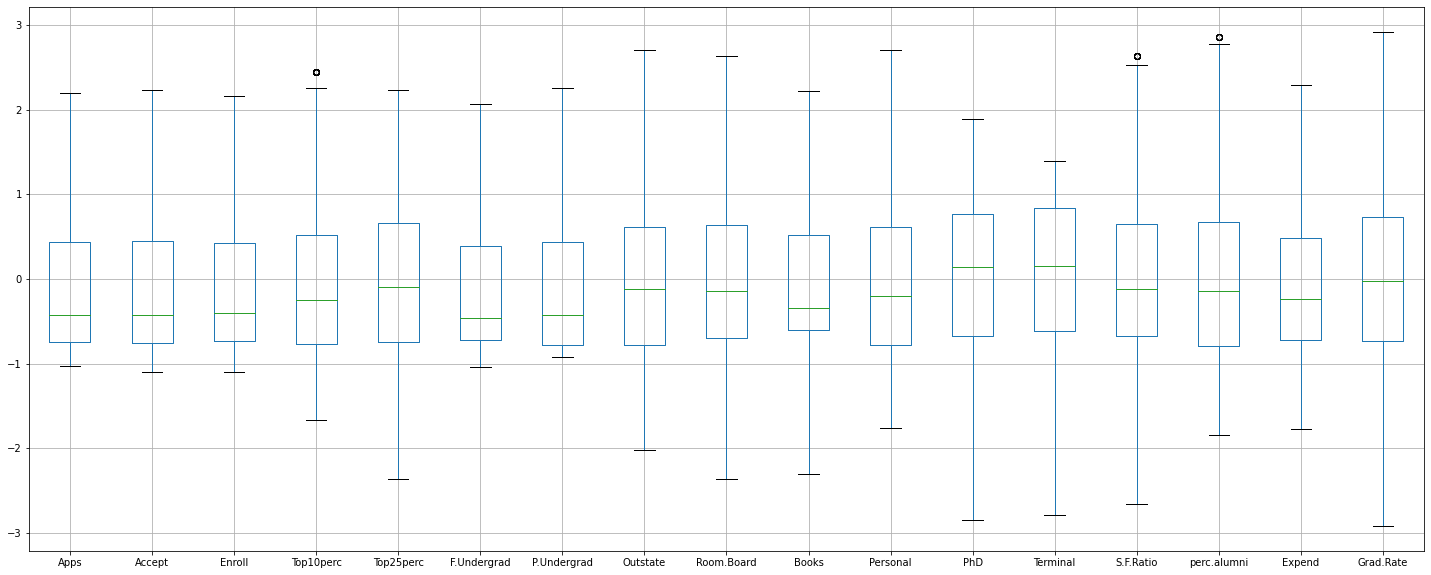

In [40]:
df_num_scaled.boxplot(figsize=(25,10))

In [41]:
pca.explained_variance_ratio_

array([0.33266084, 0.28755345, 0.06617164, 0.05898144, 0.05123893,
       0.04498639, 0.03436243])

In [42]:
var = np.cumsum(np.round(pca.explained_variance_ratio_,3))*100
var

array([33.3, 62.1, 68.7, 74.6, 79.7, 84.2, 87.6])

In [43]:
df_pca_loading = pd.DataFrame(pca.components_,columns=list(df_num_scaled))
df_pca_loading.shape

(7, 17)

In [44]:
df_pca_loading.head(7)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.262172,0.230562,0.189276,0.338875,0.334691,0.163293,0.022480,0.283547,0.244187,0.096708,-0.035230,0.326411,0.323116,-0.163152,0.186611,0.328956,0.238822
1,0.314136,0.344624,0.382813,-0.099319,-0.059506,0.398636,0.357550,-0.251864,-0.131909,0.093974,0.232440,0.055139,0.043033,0.259805,-0.257093,-0.160009,-0.167524
2,-0.081018,-0.107659,-0.085530,0.078829,0.050794,-0.073708,-0.040357,-0.014939,0.021138,0.697121,0.530973,-0.081113,-0.058979,-0.274151,-0.103716,0.184206,-0.245336
3,0.098776,0.118140,0.009307,-0.369115,-0.416824,0.013950,0.225351,0.262975,0.580894,-0.036156,-0.114983,-0.147261,-0.089008,-0.259486,-0.223982,0.213756,-0.036192
4,0.219898,0.189635,0.162315,0.157211,0.144449,0.102728,-0.095679,0.037275,-0.069108,0.035406,-0.000475,-0.550787,-0.590407,-0.142843,0.128216,-0.022424,0.356843
5,0.002188,-0.016521,-0.068079,-0.088866,-0.027627,-0.051647,-0.024538,-0.020386,0.237267,0.638605,-0.381496,0.003344,0.035412,0.468753,0.012567,-0.231562,0.313556
6,-0.028372,-0.012958,-0.015240,-0.257455,-0.239039,-0.031175,-0.010014,0.094537,0.094521,-0.111193,0.639418,0.089232,0.091699,0.152865,0.391401,-0.150501,0.468642


In [45]:
from matplotlib.patches import Rectangle

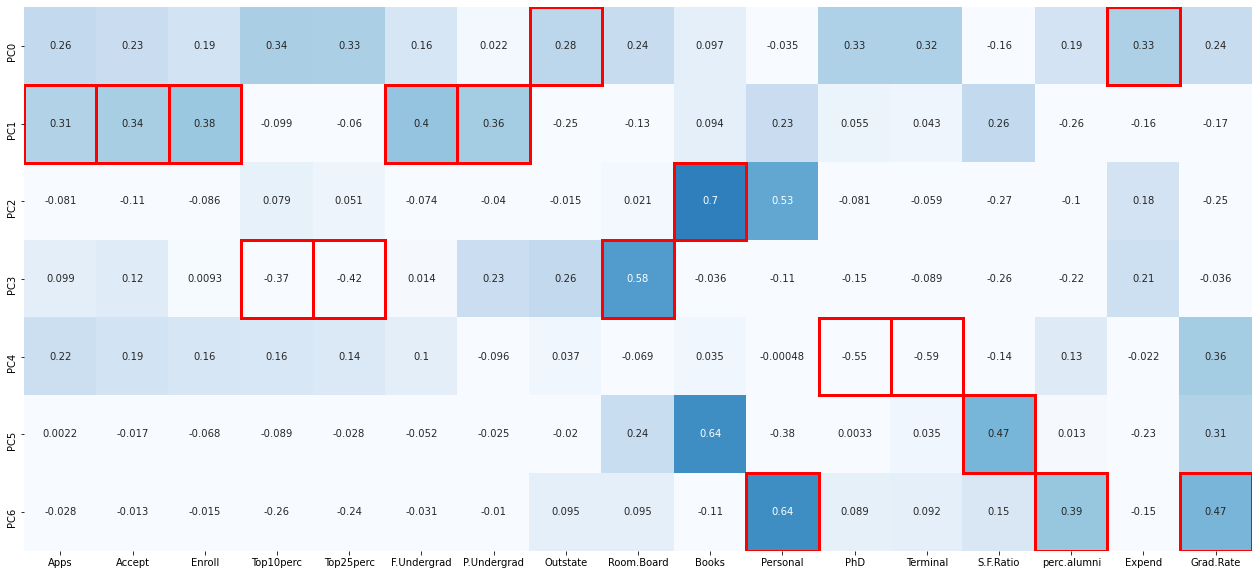

In [46]:
fig,ax = plt.subplots(figsize=(22, 10), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_pca_loading, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC0','PC1','PC2','PC3','PC4','PC5','PC6'])

column_max = df_pca_loading.abs().idxmax(axis=0)

for col, variable in enumerate(df_pca_loading.columns):
    position = df_pca_loading.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

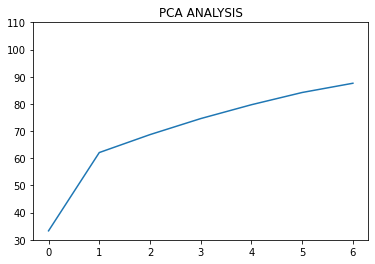

In [47]:
plt.title('PCA ANALYSIS')
plt.ylim(30,110)
plt.plot(var)